1. 分包加载
  - 承载更多功能：小程序单个代码包的体积上限为 2M，使用分包可以提升小程序代码包总体积上限，承载更多的功能与服务。
  - 降低代码包下载耗时：使用分包后可以显著减少启动时需要下载的代码包大小，在不影响功能正常使用的前提下，有效降低启动耗时。
  - 降低小程序代码注入耗时：若未开启按需注入，小程序编译时会将所有 js 文件打包成同一个文件一次性的注入，并执行所有页面和自定义组件的代码。分包后可以降低注入和实际执行的代码- 量，从而降低注入耗时。
  - 降低页面渲染耗时：使用分包可以避免不必要的组件和页面初始化。
  - 降低内存占用：分包能够实现页面、组件和逻辑较粗粒度的按需加载，从而降低内存的占用。

2. 独立分包
 - 将部分对启动性能要求很高的页面放到特殊的独立分包中。
 - 独立分包是小程序中一种特殊类型的分包，可以独立于主包和其他分包运行
 - 从独立分包中页面进入小程序时，不需要下载主包。


 - 配置方法  在原有分包配置的基础上定义 independent 字段
  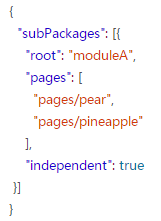

  - 使用限制 
  - 独立分包中不能依赖主包和其他分包中的内容，包括 js 文件、模板、wxss、自定义组件等；
  - App 只能在主包内定义，独立分包中不能定义 App，会造成无法预期的行为
  - 独立分包中暂时不支持使用插件。


3. 分包预下载
  - 当用户在使用小程序过程中跳转到分包内页面时，需要等待分包下载完成后才能进入页面，造成页面切换的延迟，影响小程序的使用体验
 - 独立分包和分包预下载可以配合使用，获得更好的效果

 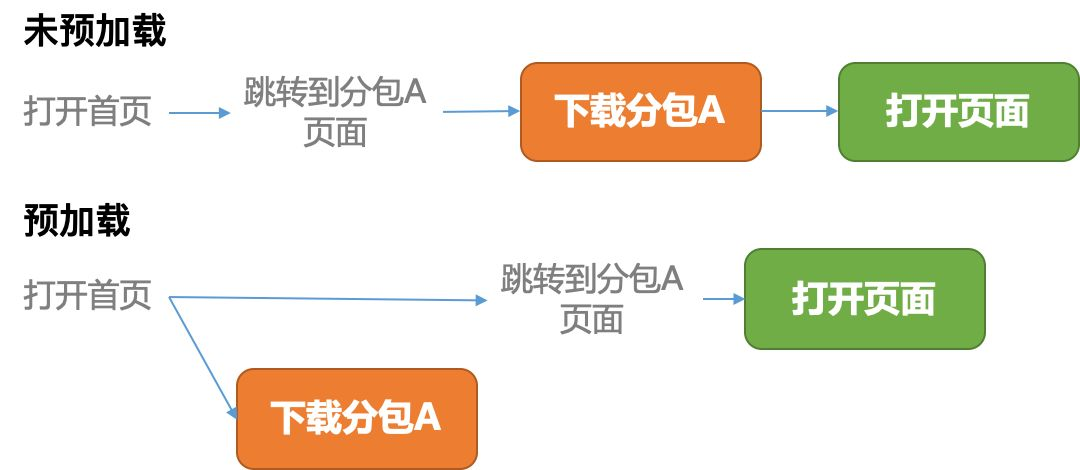

 - 配置方法
   开发者可以通过在 app.json 中增加 preloadRule 字段，控制进入某个页面时进行预下载的分包，并设置触发预下载的网络环境。

   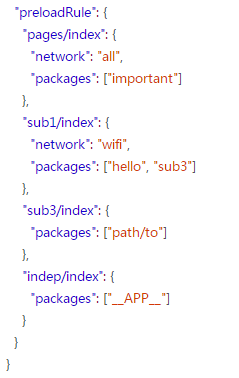


4. 1.3 分包异步化
「分包异步化」将小程序的分包从页面粒度细化到组件甚至文件粒度。这使得本来只能放在主包内页面的部分插件、组件和代码逻辑可以剥离到分包中，并在运行时异步加载，从而进一步降低启动所需的包大小和代码量。
分包异步化能有效解决主包大小过度膨胀的问题。


4. 控制代码包内的资源文件
小程序代码包在下载时会使用 ZSTD 算法进行压缩，图片、音频、视频、字体等资源文件会占用较多代码包体积，并且通常难以进一步被压缩，对于下载耗时的影响比代码文件大得多。

建议开发者在代码包内的图片一般应只包含一些体积较小的图标，避免在代码包中包含或在 WXSS 中使用 base64 内联过多、过大的图片等资源文件。这类文件应尽可能部署到 CDN，并使用 URL 引入。


5. 及时清理无用代码和资源

除了工具默认忽略或开发者明确声明忽略的文件外，小程序打包会将工程目录下所有文件都打入代码包内。意外引入的第三方库、版本迭代中被废弃的代码或依赖、产品环境不需要的测试代码、未使用的组件、插件、扩展库，这些没有被实际使用到的文件和资源也会被打入到代码包里，从而影响到代码包的大小。

建议使用微信开发者工具提供的「代码静态依赖分析」，不定期地分析代码包的文件构成和依赖关系，以此优化代码包大小和内容。对于仅用于本地开发调试，不应包含在小程序代码包的文件，可以使用工具设置的 packOptions.ignore 配置忽略规则。

在使用打包工具（如 Webpack、Rollup 等）对小程序代码进行预处理时，可以利用 tree-shaking 等特性去除冗余代码，也要注意防止打包时引入不需要的库和依赖。

 - packOptions.ignore 字段，用以配置打包时对符合指定规则的文件或文件夹进行忽略，以跳过打包的过程，这些文件或文件夹将不会出现在预览或上传的结果内。

 ```json
{
  "packOptions": {
    "ignore": [{
      "type": "file",
      "value": "test/test.js"
    }, {
      "type": "folder",
      "value": "test"
    }, {
      "type": "suffix",
      "value": ".webp"
    }, {
      "type": "prefix",
      "value": "test-"
    }, {
      "type": "glob",
      "value": "test/**/*.js"
    }, {
      "type": "regexp",
      "value": "\\.jsx$"
    }]
  }
}
 ```



